<a href="https://colab.research.google.com/github/fasantosgh/MVP_AnaliseDados/blob/main/C%C3%B3pia_de_MVP_AnaliseDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import io
import requests
#
#
#   Carregamento dos datasets
#
print("Iniciando a fase ETL: ")
print("Lendo os datasets: ")
dataset = "https://raw.githubusercontent.com/fasantosgh/MVP_AnaliseDados/refs/heads/main/StudentPerformanceFactors.csv"
stdperf = pd.read_csv(dataset, sep=",")
stdperf.head()


Iniciando a fase ETL: 
Lendo os datasets: 


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
# Verficando as dimensões do dataset (20 colunas e 6607 linhas)
#
stdperf.shape

(6607, 20)

In [ ]:
# Verificando que stdperf é um dataframe:
#
type(stdperf)
#
# Exibindo últimas linhas
#
stdperf.tail()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68
6606,15,67,Medium,Low,Yes,9,94,Medium,Yes,0,Medium,Medium,Public,Positive,4,No,Postgraduate,Near,Male,64


In [ ]:
# exibindo os nomes das colunas
stdperf.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [ ]:
# exibindo a quantidade de linhas por coluna
stdperf.count()

,0
Hours_Studied,6607
Attendance,6607
Parental_Involvement,6607
Access_to_Resources,6607
Extracurricular_Activities,6607
Sleep_Hours,6607
Previous_Scores,6607
Motivation_Level,6607
Internet_Access,6607
Tutoring_Sessions,6607


In [ ]:
# Exibindo um sumário estatístico
#
stdperf.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [ ]:
# Ordenando o dataframe por uma coluna
#
stdperf.sort_values(by='Exam_Score')

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
1101,3,62,Medium,Low,No,6,67,Medium,Yes,1,Low,Medium,Public,Negative,3,No,High School,Near,Male,55
5507,5,65,Low,High,No,7,71,Medium,Yes,0,Low,Medium,Private,Negative,2,No,College,Far,Male,56
2880,7,66,High,Low,Yes,8,68,High,Yes,0,Low,Medium,Public,Negative,2,Yes,College,Moderate,Male,57
3543,14,67,Low,Low,Yes,7,66,Low,Yes,0,Low,Medium,Public,Neutral,4,No,High School,Far,Female,57
5719,9,64,Medium,Low,Yes,10,68,Low,Yes,0,Medium,Medium,Private,Negative,3,No,High School,Near,Male,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6393,16,83,Low,Medium,Yes,8,92,Low,Yes,2,High,High,Public,Positive,4,No,Postgraduate,Near,Female,98
3579,14,90,High,High,Yes,8,86,Medium,Yes,4,Medium,Medium,Private,Negative,2,No,High School,Near,Female,99
2425,23,83,High,High,Yes,4,89,Low,Yes,1,Medium,Medium,Public,Negative,3,No,High School,Far,Male,99
94,18,89,High,Medium,Yes,4,73,Medium,Yes,3,High,Medium,Private,Positive,2,No,College,Near,Female,100


In [ ]:
# Selecionando linhas com Exam_score > 90
#
stdperf[stdperf['Exam_Score'] > 90]

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
94,18,89,High,Medium,Yes,4,73,Medium,Yes,3,High,Medium,Private,Positive,2,No,College,Near,Female,100
529,15,83,Medium,Medium,No,7,97,Medium,Yes,2,Low,High,Private,Neutral,2,No,High School,Near,Female,97
770,24,96,Low,High,No,6,93,Medium,Yes,2,Low,Medium,Public,Neutral,2,No,High School,Moderate,Female,94
836,29,76,Medium,Medium,No,8,96,Low,Yes,2,Low,Medium,Public,Positive,2,No,Postgraduate,Moderate,Male,94
919,21,74,High,Medium,No,6,94,Medium,Yes,1,Low,High,Public,Positive,1,No,High School,Near,Male,97
1109,31,69,Medium,Medium,No,7,52,Medium,No,2,High,Low,Public,Neutral,5,No,College,Far,Male,92
1525,27,98,Low,Medium,Yes,6,93,Low,No,5,High,High,Public,Positive,3,No,High School,Moderate,Female,101
2292,21,70,High,High,No,9,66,Medium,Yes,1,Medium,Low,Public,Neutral,4,No,College,Moderate,Male,91
2425,23,83,High,High,Yes,4,89,Low,Yes,1,Medium,Medium,Public,Negative,3,No,High School,Far,Male,99
3124,19,90,Medium,High,Yes,5,90,Low,Yes,0,Low,Medium,Public,Neutral,2,No,College,Far,Female,94


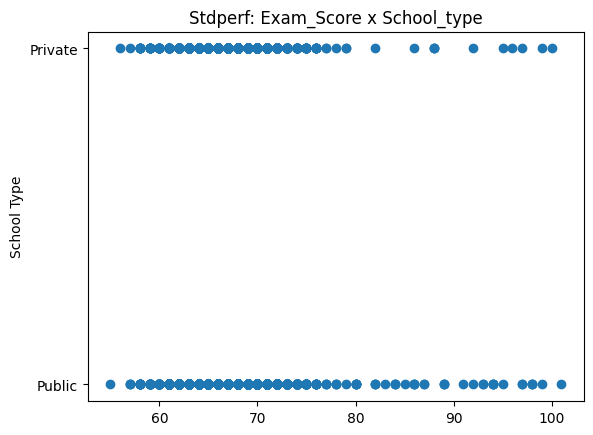

In [ ]:
# importação do pyplot
import matplotlib.pyplot as plt

# plotando o gráfico de comprimento x largura da sépala
plt.scatter(stdperf['Exam_Score'], stdperf['School_Type'])

# incluindo título do gráfico e rótulos dos eixos
plt.title('Stdperf: Exam_Score x School_type')
plt.xlabel('')
plt.ylabel('School Type');

In [ ]:
# dataset2 = "https://raw.githubusercontent.com/fasantosgh/MVP_EngDados/main/WorldBank_Population_Data.csv"
# bronzedf2 = pd.read_csv(dataset2)
# Remover as duas primeiras colunas do DataFrame Pandas
bronzedf2 = bronzedf2.iloc[:, 2:]
# Função para renomear as colunas
def rename_columns(col):
    if '[' in col and ']' in col:
        return col.split(' [')[0]
    return col
#
# Aplicar a função para renomear as colunas para evitar erro na criação do Dataframe
bronzedf2.columns = [rename_columns(col) for col in bronzedf2.columns]
# Remover espaços em branco no início e no fim e dentro dos nomes das colunas
bronzedf2.columns = bronzedf2.columns.str.strip().str.replace(' ', '')



In [ ]:
%sql
CREATE DATABASE bronze

In [ ]:
df1 = spark.createDataFrame(bronzedf1)
df2 = spark.createDataFrame(bronzedf2)
df1.write.mode("overwrite").saveAsTable("bronze.carsales")
df2.write.mode("overwrite").saveAsTable("bronze.pop")

In [ ]:
%sql
SELECT * FROM bronze.carsales LIMIT 10

region,category,parameter,mode,powertrain,year,unit,value
Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49
Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170
Australia,Historical,EV sales,Cars,PHEV,2012,Vehicles,80
Australia,Historical,EV sales,Cars,PHEV,2013,Vehicles,100
Australia,Historical,EV sales,Cars,BEV,2013,Vehicles,190
Australia,Historical,EV sales,Cars,BEV,2014,Vehicles,370
Australia,Historical,EV sales,Cars,PHEV,2014,Vehicles,950
Australia,Historical,EV sales,Cars,PHEV,2015,Vehicles,1000
Australia,Historical,EV sales,Cars,BEV,2015,Vehicles,760
Australia,Historical,EV sales,Cars,BEV,2016,Vehicles,670


In [ ]:
%sql
SELECT * FROM bronze.pop LIMIT 10

CountryName,CountryCode,1990,2000,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Afghanistan,AFG,10694796,19542982,28189672,29249157,30466479,31541209,32716210,33753499,34636207,35643418,36686784,37769499,38972230,40099462,41128771,42239854
Albania,ALB,3286542,3089027,2913021,2905195,2900401,2895092,2889104,2880703,2876101,2873457,2866376,2854191,2837849,2811666,2777689,2745972
Algeria,DZA,25518074,30774621,35856344,36543541,37260563,38000626,38760168,39543154,40339329,41136546,41927007,42705368,43451666,44177969,44903225,45606480
American Samoa,ASM,47818,58230,54849,54310,53691,52995,52217,51368,50448,49463,48424,47321,46189,45035,44273,43914
Andorra,AND,53569,66097,71519,70567,71013,71367,71621,71746,72540,73837,75013,76343,77700,79034,79824,80088
Angola,AGO,11828638,16394062,23364185,24259111,25188292,26147002,27128337,28127721,29154746,30208628,31273533,32353588,33428486,34503774,35588987,36684202
Antigua and Barbuda,ATG,63328,75055,85695,86729,87674,88497,89236,89941,90564,91119,91626,92117,92664,93219,93763,94298
Argentina,ARG,32637657,37070774,40788453,41261490,41733271,42202935,42669500,43131966,43590368,44044811,44494502,44938712,45376763,45808747,46234830,46654581
Armenia,ARM,3556539,3168523,2946293,2928976,2914421,2901385,2889930,2878595,2865835,2851923,2836557,2820602,2805608,2790974,2780469,2777970
Aruba,ABW,65712,89101,100341,101288,102112,102880,103594,104257,104874,105439,105962,106442,106585,106537,106445,106277


In [ ]:
%sql
CREATE DATABASE silver

In [ ]:
#
#    Camada Silver
#
#
from pyspark.sql.functions import sum
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import FloatType
from pyspark.sql.window import Window
#
print("Números de linhas e colunas do df1: ")
print(df1.count())
print(len(df1.columns))
print()
print("Números de linhas e colunas do df2: ")
print(df2.count())
print(len(df2.columns))
print("Estatísticas das colunas")
display(df1.describe())
display(df2.describe())
#
print("Eliminando linhas duplicadas")
df1 = df1.dropDuplicates()
df2 = df2.dropDuplicates()
#
#

Números de linhas e colunas do df1: 
834
8

Números de linhas e colunas do df2: 
271
18
Estatísticas das colunas


summary,region,category,parameter,mode,powertrain,year,unit,value
count,834,834,834,834,834,834,834,834
mean,null,null,null,null,null,2016.5791366906474,null,81414.32014388489
stddev,null,null,null,null,null,3.5114761226476605,null,407236.2264068316
min,Australia,Historical,EV sales,Cars,BEV,2010,Vehicles,1
max,World,Historical,EV sales,Cars,PHEV,2022,Vehicles,7300000


summary,CountryName,CountryCode,1990,2000,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,266,266,266,266,266,266,266,266,266,266,266,266,266,266,266,266,266,266
mean,null,null,2.0809515570943397E8,2.4396145620754716E8,2.795145017283019E8,2.832228026679245E8,2.870575868188679E8,2.909284819509434E8,2.9480066256226414E8,2.986441869698113E8,3.0248709113584906E8,3.0633702181509435E8,3.101259382528302E8,3.138347782150943E8,3.174293017735849E8,3.2067826090943396E8,3.2362183554339623E8,3.269709623773585E8
stddev,null,null,6.601834501534083E8,7.718466296637123E8,8.773524662865778E8,8.883169433526047E8,8.996429623812058E8,9.110526025996054E8,9.224214258433113E8,9.336474457861443E8,9.44808129389622E8,9.559803089353604E8,9.668651002263539E8,9.774203730286256E8,9.875137159478053E8,9.965683193014526E8,1.0044735322642696E9,1.0134694040494038E9
min,Afghanistan,ABW,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..
max,Zimbabwe,ZWE,9983218,9979610,9842880,9971727,9920362,99700107,99746766,9843028,99784030,998532743,9939771,9958829,98462,9949437,9952787,98858950


Eliminando linhas duplicadas


In [ ]:
# Criação de uma SparkSession
spark = SparkSession.builder.getOrCreate()
# Renomeando a coluna para facilitar o join
df2 = df2.withColumnRenamed("CountryName", "region")
# Convertendo df2 de wide para long format
years = [str(year) for year in range(2010, 2023)]
# population_columns = [f"`{year} [YR{year}]`" for year in years]
population_columns = [f"`{year}`" for year in years]
#
# Criando uma coluna com array de structs (year, population)
df2_long = df2.withColumn("populations", array([
    struct(expr(f"{population_columns[i]}").alias("population"), expr(f"{years[i]}").alias("year"))
    for i in range(len(years))
])).select("region", explode(col("populations")).alias("pop"))
#
# Separando a struct em colunas individuais
df2_long = df2_long.select("region", col("pop.year").alias("year"), col("pop.population").alias("population"))
#
# Realizando o join entre df1 e df2_long
result_df = df1.join(df2_long, on=["region", "year"], how="inner")
#
# Selecionando apenas as colunas necessárias
result_df = result_df.select("region", "powertrain", "year", "value", "population")
#
# Mostrando o resultado
#
result_df.show(n=20, truncate=False)
result_df.printSchema()
#
#
result_df.write.mode("overwrite").saveAsTable("silver.carsalespop")
#



+---------+----------+----+-----+----------+
|region   |powertrain|year|value|population|
+---------+----------+----+-----+----------+
|Brazil   |PHEV      |2013|33   |201721767 |
|Belgium  |BEV       |2021|23000|11586195  |
|Austria  |PHEV      |2017|1700 |8797566   |
|Canada   |BEV       |2011|220  |34339221  |
|Australia|PHEV      |2018|1800 |24963258  |
|Australia|BEV       |2017|1200 |24592588  |
|Belgium  |BEV       |2015|1400 |11274196  |
|Brazil   |PHEV      |2021|11000|214326223 |
|Canada   |PHEV      |2014|2300 |35434066  |
|Belgium  |PHEV      |2013|60   |11159407  |
|Brazil   |BEV       |2022|8500 |215313498 |
|Australia|PHEV      |2014|950  |23475686  |
|Canada   |BEV       |2014|2800 |35434066  |
|Brazil   |BEV       |2015|59   |205188205 |
|Brazil   |BEV       |2016|130  |206859578 |
|Australia|PHEV      |2016|700  |24190907  |
|Belgium  |BEV       |2022|38000|11685814  |
|Brazil   |PHEV      |2022|10000|215313498 |
|Belgium  |BEV       |2012|570  |11106932  |
|Brazil   

In [ ]:
%sql
SELECT * FROM silver.carsalespop
ORDER BY region, year
LIMIT 100

region,powertrain,year,value,population
Australia,BEV,2011,49,22340024
Australia,BEV,2012,170,22733465
Australia,PHEV,2012,80,22733465
Australia,PHEV,2013,100,23128129
Australia,BEV,2013,190,23128129
Australia,PHEV,2014,950,23475686
Australia,BEV,2014,370,23475686
Australia,BEV,2015,760,23815995
Australia,PHEV,2015,1000,23815995
Australia,PHEV,2016,700,24190907


In [ ]:
#
#   Camada Gold
#
#   Consulta de vendas de carros elétricos em 2022
#
#
from pyspark.sql import SparkSession
from pyspark.sql.functions import sum as spark_sum
# Criando uma sessão Spark
spark = SparkSession.builder.appName("Exemplo").getOrCreate()
filtered_df = result_df.filter(
    (col("region") == "World") &
    (col("year") == 2022)   &
    ((col("powertrain") == "BEV") | (col("powertrain") == "PHEV"))
)
# Verificando as linhas filtradas
filtered_df.show(n=100, truncate=False)
# Verificar se há registros nulos na coluna "value"
filtered_df.filter(col("value").isNull()).show()
# Selecionar a coluna "value" e calcular a soma dos valores
vendas_2022 = filtered_df.agg(spark_sum("value")).collect()[0][0]
#
# Imprimir o resultado
print("")
print(f"Quantidade de carros elétricos vendidos em 2022 no mundo: {vendas_2022}")
#
# Filtrar o DataFrame as vendas de 2010 a 2022
filtered2_df = result_df.filter(
    (col("region") == "World") &
    ((col("year") >= 2010) | (col("year") <= 2022))  &
    ((col("powertrain") == "BEV") | (col("powertrain") == "PHEV"))
)
# Selecionar a coluna "value" e calcular a soma dos valores
vendas_2010_2022 = filtered2_df.agg(spark_sum("value")).collect()[0][0]
#
print("")
print(f"Quantidade de carros elétricos vendidos no período de 2010 a 2022 no mundo: {vendas_2010_2022}")
#
#
# Converter a coluna 'population' para float, tratando erros como NULL
result_df = result_df.withColumn(
    "population",
    when(col("population").cast(FloatType()).isNotNull(), col("population").cast(FloatType())).otherwise(None)
)
#
# Filtrar o DataFrame para o ano de 2022 e eliminar a região "World"
#
filtered3_df = result_df.filter(
    (col("region") != "World") &
    ((col("year") >= 2010) | (col("year") <= 2022))
)
#
# Agrupar por 'region' e somar a coluna 'value'
grouped_df = filtered3_df.groupBy("region").agg(spark_sum("value").alias("total_value"))
#
# Ordenar os resultados pela soma de 'value' em ordem decrescente
sorted_df = grouped_df.orderBy(col("total_value").desc())
#
# Selecionar as 10 primeiras regiões com os maiores valores
top_10_mercados_2022 = sorted_df.limit(10)
#
#
# Exibindo os dez maiores mercados de powertrain BEV e PHEV somados no mundo em 2022
print("")
print(f"Dez maiores mercados de carros elétricos vendidos de 2010 a 2022: ")
print("")
top_10_mercados_2022.show(truncate=False)
#
# Agrupar por 'region' e somar a coluna 'value'
grouped3_df = filtered3_df.groupBy("region").agg(
    spark_sum("value").alias("total_value"),
    last("population").alias("population")
)
#
# Calcular a relação valor/população
grouped3_df = grouped3_df.withColumn("relação_valor_população", col("total_value") / col("population"))
#
# Ordenar os resultados pela relação valor/população em ordem decrescente
sorted3_df = grouped3_df.orderBy(col("relação_valor_população").desc())
#
# Selecionar as 10 primeiras regiões com as maiores relações valor/população
top_10_mercados_populacao = sorted3_df.limit(10)
#
#
# Calcular o ranking absoluto com base no valor total
window_spec = Window.orderBy(desc("total_value"))
sorted3_df = sorted3_df.withColumn("rank_absoluto", rank().over(window_spec))
#
#
# Calcular o ranking relativo com base na relação valor/população
window_spec_rel = Window.orderBy(desc("relação_valor_população"))
sorted3_df = sorted3_df.withColumn("rank_relativo", rank().over(window_spec_rel))
#
# Obter a posição do Brasil em ambos os rankings
posicao_absoluta_brasil = sorted3_df.filter(col("region") == "Brazil").select("rank_absoluto").collect()[0][0]
posicao_relativa_brasil = sorted3_df.filter(col("region") == "Brazil").select("rank_relativo").collect()[0][0]
#
# Imprimir as posições do Brasil
print("")
print(f"Posição do Brasil em números absolutos: {posicao_absoluta_brasil}")
print("")
print(f"Posição do Brasil em relação à população: {posicao_relativa_brasil}")
#
# Exibindo os dez maiores mercados de powertrain BEV e PHEV somados em relação à população
# Ordenando pela relação valor/população e selecionando os dez maiores mercados
print("")
print(f"Dez maiores mercados de VEs em relação a sua população de 2022:")
top_10_mercados_populacao.show(truncate=False)
#
# Filtrando os dados do Brasil em 2022
brazil_2022 = result_df.filter(
    (col("region") == "Brazil") &
    (col("year") == 2022)
)
#
vendas_brasil_2022 = brazil_2022.agg(spark_sum("value")).collect()[0][0]
#
print("")
print(f"Vendas de carros elétricos no Brasil em 2022: {vendas_brasil_2022}")


+------+----------+----+-------+----------+
|region|powertrain|year|value  |population|
+------+----------+----+-------+----------+
|World |BEV       |2022|7300000|7951595433|
|World |PHEV      |2022|2900000|7951595433|
+------+----------+----+-------+----------+

+------+----------+----+-----+----------+
|region|powertrain|year|value|population|
+------+----------+----+-----+----------+
+------+----------+----+-----+----------+


Quantidade de carros elétricos vendidos em 2022 no mundo: 10200000

Quantidade de carros elétricos vendidos no período de 2010 a 2022 no mundo: 26984570

Dez maiores mercados de carros elétricos vendidos de 2010 a 2022: 

+--------------+-----------+
|region        |total_value|
+--------------+-----------+
|China         |13675150   |
|Germany       |2211480    |
|United Kingdom|1134238    |
|France        |1054016    |
|Norway        |749420     |
|Sweden        |511344     |
|Netherlands   |505987     |
|Japan         |468815     |
|Canada        |392740  